In [82]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
url = 'https://interactive.guim.co.uk/docsdata/1q5gdePANXci8enuiS4oHUJxcxC13d6bjMRSicakychE.json'
res = requests.get(url)
updates = res.json()['sheets']['updates']

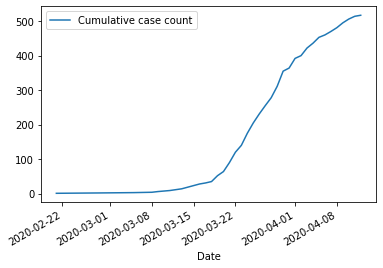

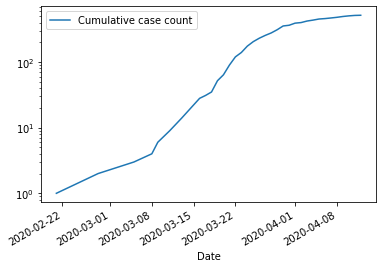

In [84]:
df=pd.DataFrame([d for d in updates])

df = df[['State','Cumulative case count','Date']]
df['Cumulative case count'] = pd.to_numeric(df['Cumulative case count'])
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

wa_df = df.loc[df['State'] == 'WA']
wa_df = wa_df.dropna()

wa_df.plot(x ='Date', y='Cumulative case count', kind = 'line')
wa_df.plot(x ='Date', y='Cumulative case count', kind = 'line', logy=True)

In [85]:
wa_df.sort_values(by=['Date'], ascending=False).head()

,State,Cumulative case count,Date
351,WA,517.0,2020-04-12
342,WA,514.0,2020-04-11
335,WA,506.0,2020-04-10
328,WA,495.0,2020-04-09
320,WA,481.0,2020-04-08


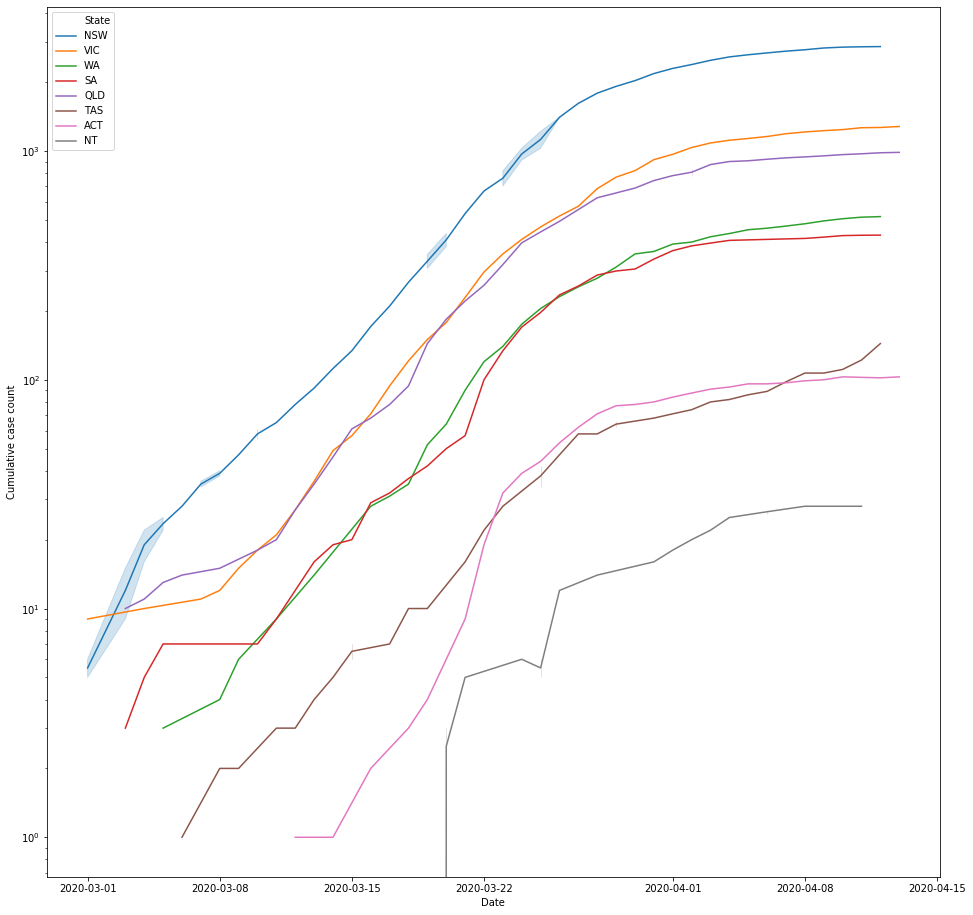

In [86]:
df = df[(df.Date > '2020-02-29') ]
fig, ax = plt.subplots(figsize=(16, 16))
# Set the scale of the x-and y-axes
ax.set(yscale="log")

sns.lineplot(data=df, x ='Date', y='Cumulative case count',  hue='State' )

In [87]:
all_df = df.groupby(['Date']).sum()

all_df['State'] = 'Australia'
all_df['Date'] = all_df.index

print(all_df.columns)


pd.concat([df, all_df])

Index(['Cumulative case count', 'State', 'Date'], dtype='object')


,State,Cumulative case count,Date
53,NSW,5.0,2020-03-01
54,NSW,6.0,2020-03-01
55,VIC,9.0,2020-03-01
56,WA,NaN,2020-03-01
57,SA,3.0,2020-03-03
...,...,...,...
2020-04-09 00:00:00,Australia,6546.0,2020-04-09
2020-04-10 00:00:00,Australia,6200.0,2020-04-10
2020-04-11 00:00:00,Australia,7589.0,2020-04-11
2020-04-12 00:00:00,Australia,6306.0,2020-04-12


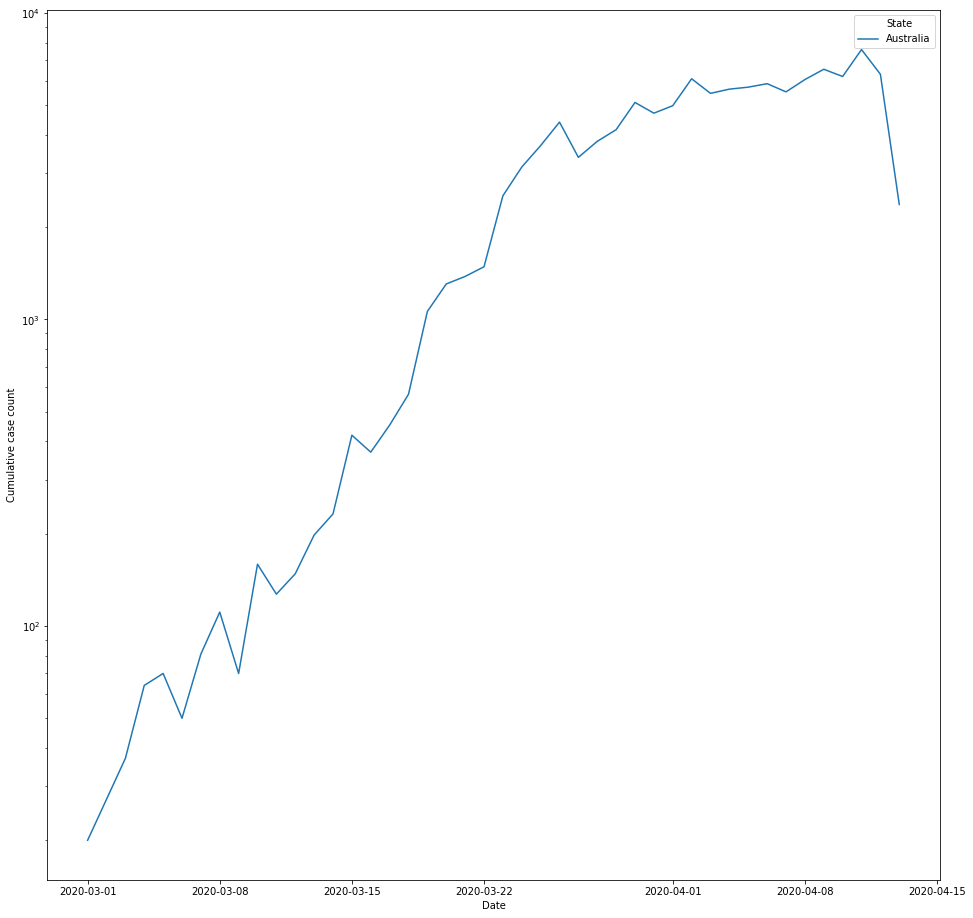

In [88]:
fig2, ax2 = plt.subplots(figsize=(16, 16))
# Set the scale of the x-and y-axes
ax2.set(yscale="log")

sns.lineplot(data=all_df, x ='Date', y='Cumulative case count',  hue='State' )